### Exploratory Data Analysis (EDA)

**Exploratory data analysis (EDA)** is an approach of analyzing data sets to summarize their main characteristics, using statistical graphics and other data visualization methods.

#### Importance

The main purpose of exploratory data analysis (EDA) is to help look at data before making any decision/assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables. In otherwords, it gives more insight into the data.

EDA can be conducted in the following ways:

- **Univariate**:\
i. *Non-graphical*: This is the simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.<br>
ii. *Graphical*:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.

- **Multivariate**:\
i. *Non-graphical*: Multivariate non-graphical EDA techniques generally shows the relationship between two or more variables in the data, through cross-tabulation or statistics.<br>
ii. *Graphical*: Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

####  Univariate Non-Graphical Analysis

For this analysis, we are going to evaluate the datatset on the following bases:
1. Check datatypes of the dataset.
2. Check for null values.

In this section we want to apply a variety of techniques to maximize specific insights into a dataset, reveal underlying structure, extract significant variables, and detect outliers and anomalies. In essence, we want to dig deeper into our dataset to more insights about its behaviour!

### Import Necessary Libraries/Packages

First we need to load the libraries we are going to use throughout our notebook. After which we will load our train and test data, but let's take a brief look at some of the packages will be using:


### Libraries Description

libraries are software that provide tools and functions for building and implementing machine learning models.

The following libraries will be used to aid creation of a sentiment analysis model.

- **Numpy**:- NumPy (short for Numerical Python) is “the fundamental package for scientific computing with Python” and it is the library Pandas, Matplotlib and Scikit-learn builds on.
- **Pandas**:- a software library for data manipulation and analysis.
- **Sklearn**:- this library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
- **Nltk**:- is a suite that contains libraries and programs for statistical language processing. It is one of the most powerful NLP(Natural Language Processing. (NLP) is a process of manipulating or understanding the text or speech by any software or machine.) libraries, which contains packages to make machines understand human language and reply to it with an appropriate response. 
- **re**:- This module provides a set of powerful regular expression facilities, which allows for a quick check whether a given string matches a given pattern (using the match function), or contains such a pattern (using the search function). 
- **String**:-This module contains a number of functions to process standard Python strings.
- **Copy**:- The module copy in programming refers to a functionality or library that provides mechanisms for creating copies of objects or data structures. 
- **Matplotlib**:- a library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**:- a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. 

In [1]:
pip install libpysal geopandas

In [2]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install convertbng

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install contextily

In [6]:
pip install folium matplotlib mapclassify

Note: you may need to restart the kernel to use updated packages.


In [8]:
from io import StringIO
import boto3
import pandas as pd
from boto3 import client
import dotenv
import os
import sys
#import pysal as ps
import libpysal
import geopandas as gpd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import io
import folium
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from IPython.display import display, HTML

# Geographic data manipulation and plotting
from convertbng.util import convert_lonlat
import shapely
from shapely.geometry import Point
import contextily as cx
import numpy as np

### Data Description, Loading from S3 Bucket, and Viewing

The "Discharge to Environment (DTE) Alert stream" in the Thames Water API refers to a data stream that provides information about discharges of wastewater or effluent into the environment. This data is crucial for environmental monitoring and management, particularly for assessing the impact of such discharges on water quality and ecological health.

The data provided in this stream may include various metrics and parameters related to wastewater discharge, such as:

1. **Volume of Discharge**: This could be the quantity of wastewater being discharged into the environment, typically measured in litres or cubic meters per time interval.
2. **Quality of Discharge**: Parameters such as biochemical oxygen demand (BOD), chemical oxygen demand (COD), suspended solids, pH, and concentrations of various pollutants might be included to assess the quality of the discharged water.
3. **Location of Discharge:** Information about the location(s) where the discharge is occurring, possibly specified by geographic coordinates or other identifiers.
4. **Compliance Status:** Whether the discharge meets regulatory standards and environmental regulations, including any alerts or notifications related to non-compliance.
5. **Timestamps:** Time and date information indicating when the discharge data was recorded or when any alerts were triggered.

### Frequency of Update

The API updates with new information every 30 minutes, but different places might get the updates at different times. Also, there are different kinds of sensors that send data at various intervals, which could be up to 30 minutes apart.

### What Fields are in the dataset?

dte_alertstream = {

"LocationName": object,

"PermitNumber": object,

"LocationGridRef": object,

"X": int,

"Y": int,

"ReceivingWaterCourse": object,

"AlertType": object,

"DateTime": datetime}

##### The fields in the dataset and specific field description as shown below:

<div align="center" style="width: 900px; font-size: 80%; text-align: center; margin: 0 auto;">
  <img src="https://media.discordapp.net/attachments/1218176172211437649/1232998500686630972/image.png?ex=6649d156&is=66487fd6&hm=4b8c0ee1fc2c5262ba876550f55d843161705679142cc7a7a0ba0a2f68c87a0a&=&format=webp&quality=lossless&width=1360&height=662"
       alt="Dummy image 1"
       style="display: block; margin: 0 auto; padding-bottom: 0.5em;"
       width="900px"/>
</div>


In [9]:
# Insert the parent path relative to this notebook, so we can import from the src folder.
sys.path.insert(0, "..")

# Load Environment Variables
dotenv.load_dotenv("../.env")

region_name = os.getenv("AWS_REGION")
access_key = os.getenv("AWS_ACCESS_KEY_ID")
access_secret = os.getenv("AWS_SECRET_ACCESS_KEY")
bucket_name = os.getenv("BUCKET_NAME")

In [10]:
  # Create an S3 client and resource
s3 = boto3.client("s3")
s3 = boto3.resource(
        service_name="s3",
        region_name=region_name,
        aws_access_key_id=access_key,
        aws_secret_access_key=access_secret,
    )

In [11]:
# Function to download file from S3 bucket
def download_file_from_s3(bucket_name, key_name, csv_file, region_name, access_key, access_secret):
    # Create an S3 client
    s3 = boto3.client('s3', region_name=region_name, aws_access_key_id=access_key, aws_secret_access_key=access_secret)
    try:
        s3.download_file(bucket_name, key_name, csv_file)
        print(f"File downloaded from S3 bucket: {csv_file}")
    except Exception as e:
        print(f"Error downloading file from S3 bucket: {e}")

In [12]:
# Specify your S3 bucket details
key_name = "Thames_water_data_set/processed_csv_data/thames_water_alert_stream.csv" 
csv_file = "thames_water_alert_stream.csv"

In [13]:
# Download file from S3 bucket
download_file_from_s3(bucket_name, key_name, csv_file, region_name, access_key, access_secret)

File downloaded from S3 bucket: thames_water_alert_stream.csv


In [14]:
# Read the CSV file into DataFrame
df_alert_stream = pd.read_csv(csv_file)

In [15]:
df_alert_stream.head()

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,DateTime
0,clanfield,cssc.1001,sp29000181,429000,201810,marsh lane west ditch,start,2024-05-06 07:00:00
1,cottered,cssc.1038,tl31522968,531520,229680,cottered brook,stop,2024-05-06 06:30:00
2,barkway,catm.3093,tl38783476,538780,234760,river quin,stop,2024-05-06 06:15:00
3,willingale,cssc.1456,tl58950707,558950,207070,tributary of river roding,start,2024-05-06 06:00:00
4,willingale,cssc.1456,tl58950707,558950,207070,tributary of river roding,stop,2024-05-06 05:30:00


In [16]:
df_alert_stream.tail()

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,DateTime
195,stone,cssc.2319,sp78131062,478130,210620,scotsgrove brook,stop,2024-05-04 13:30:00
196,cuddington,cssc.2446,sp73801196,473800,211960,river thame,start,2024-05-04 13:30:00
197,sevenhampton village,cssc.1425,su20929005,420920,190050,tributary of river cole,stop,2024-05-04 13:15:00
198,henley,temp.2657,su76058418,476050,184180,fawley court stream,stop,2024-05-04 13:15:00
199,cottered,cssc.1038,tl31522968,531520,229680,cottered brook,stop,2024-05-04 13:15:00


### Exploratory Data Analysis
Using our clean data, let's perform some statistical analyses.

In [17]:
df_alert_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   LocationName          200 non-null    object
 1   PermitNumber          200 non-null    object
 2   LocationGridRef       200 non-null    object
 3   X                     200 non-null    int64 
 4   Y                     200 non-null    int64 
 5   ReceivingWaterCourse  200 non-null    object
 6   AlertType             200 non-null    object
 7   DateTime              200 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.6+ KB


In [18]:
# Check for duplicate rows
print("\nDuplicate Rows:", df_alert_stream.duplicated().sum())


Duplicate Rows: 0


Here, we have zero duplicate values in the dataset

In [19]:
# Check for missing values
df_alert_stream.isnull().sum()

LocationName            0
PermitNumber            0
LocationGridRef         0
X                       0
Y                       0
ReceivingWaterCourse    0
AlertType               0
DateTime                0
dtype: int64

Here, the function shows that there are no missings values in the dataset

In [20]:
# Display descriptive statistics for numerical features
df_alert_stream.describe()

,X,Y
count,200.000000,200.000000
mean,477202.150000,202812.050000
std,49777.525472,18661.039124
min,402500.000000,164500.000000
25%,440350.000000,196510.000000
50%,466180.000000,206810.000000
75%,532360.000000,215665.000000
max,558950.000000,252410.000000


The function 'describe()' determines the count, mean, standard deviation, minimum, Q1, Q2, Q3, and maximum for each column of the data.

In [21]:
# Check unique values in categorical features
print(df_alert_stream['ReceivingWaterCourse'].unique())

['marsh lane west ditch' 'cottered brook' 'river quin'
 'tributary of river roding' 'river thame' 'brookhouse brook'
 'hardwick brook' 'river kennet' 'feeder to boddington canal' 'river coln'
 'bledington brook ' 'river evenlode' 'bagpuize brook' 'marcham brook'
 'fawley court stream' 'faringdon stream' 'pincey brook'
 'grand union canal' 'littlestock brook' 'clifton hampton ditch'
 'harmonds brook west arm' 'gainsbridge brook' 'scotsgrove brook'
 'groundwater' 'pottery stream' 'hanborough stream' 'cripsey brook'
 'briff lane stream' 'ashridge stream' 'river colne'
 'tributary of waterloo road stream' 'wheatley ditch' 'river ray'
 'north weald brook' 'foudry brook' 'river thames' 'weston tributary '
 'warpsgrave ditch' 'tributary of river cole']


In [22]:
print(df_alert_stream['AlertType'].unique())

['start' 'stop']


##### Receiving Water Course Daily Activities

In [23]:
# Create dataframe for daily activities
ReceivingWaterCourse_per_day = df_alert_stream.copy()

In [24]:
df_alert_stream

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,DateTime
0,clanfield,cssc.1001,sp29000181,429000,201810,marsh lane west ditch,start,2024-05-06 07:00:00
1,cottered,cssc.1038,tl31522968,531520,229680,cottered brook,stop,2024-05-06 06:30:00
2,barkway,catm.3093,tl38783476,538780,234760,river quin,stop,2024-05-06 06:15:00
3,willingale,cssc.1456,tl58950707,558950,207070,tributary of river roding,start,2024-05-06 06:00:00
4,willingale,cssc.1456,tl58950707,558950,207070,tributary of river roding,stop,2024-05-06 05:30:00
...,...,...,...,...,...,...,...,...
195,stone,cssc.2319,sp78131062,478130,210620,scotsgrove brook,stop,2024-05-04 13:30:00
196,cuddington,cssc.2446,sp73801196,473800,211960,river thame,start,2024-05-04 13:30:00
197,sevenhampton village,cssc.1425,su20929005,420920,190050,tributary of river cole,stop,2024-05-04 13:15:00
198,henley,temp.2657,su76058418,476050,184180,fawley court stream,stop,2024-05-04 13:15:00


In [25]:
# Step 1: Check the data type of the 'DateTime' column
print(df_alert_stream['DateTime'].dtype)

object


In [26]:
# Step 2: Convert the 'DateTime' column to datetime if it is not already
if not pd.api.types.is_datetime64_any_dtype(df_alert_stream['DateTime']):
    df_alert_stream['DateTime'] = pd.to_datetime(df_alert_stream['DateTime'])

In [27]:
# Step 3: Create the day of week feature
ReceivingWaterCourse_per_day['day_of_week'] = df_alert_stream['DateTime'].dt.day_name()

In [28]:
ReceivingWaterCourse_per_day

,LocationName,PermitNumber,LocationGridRef,X,Y,ReceivingWaterCourse,AlertType,DateTime,day_of_week
0,clanfield,cssc.1001,sp29000181,429000,201810,marsh lane west ditch,start,2024-05-06 07:00:00,Monday
1,cottered,cssc.1038,tl31522968,531520,229680,cottered brook,stop,2024-05-06 06:30:00,Monday
2,barkway,catm.3093,tl38783476,538780,234760,river quin,stop,2024-05-06 06:15:00,Monday
3,willingale,cssc.1456,tl58950707,558950,207070,tributary of river roding,start,2024-05-06 06:00:00,Monday
4,willingale,cssc.1456,tl58950707,558950,207070,tributary of river roding,stop,2024-05-06 05:30:00,Monday
...,...,...,...,...,...,...,...,...,...
195,stone,cssc.2319,sp78131062,478130,210620,scotsgrove brook,stop,2024-05-04 13:30:00,Saturday
196,cuddington,cssc.2446,sp73801196,473800,211960,river thame,start,2024-05-04 13:30:00,Saturday
197,sevenhampton village,cssc.1425,su20929005,420920,190050,tributary of river cole,stop,2024-05-04 13:15:00,Saturday
198,henley,temp.2657,su76058418,476050,184180,fawley court stream,stop,2024-05-04 13:15:00,Saturday


In [29]:
# Create group the number by day of week
Numberof_ReceivingWaterCourse_per_day = ReceivingWaterCourse_per_day.groupby(ReceivingWaterCourse_per_day.day_of_week)['ReceivingWaterCourse'].count().reset_index()

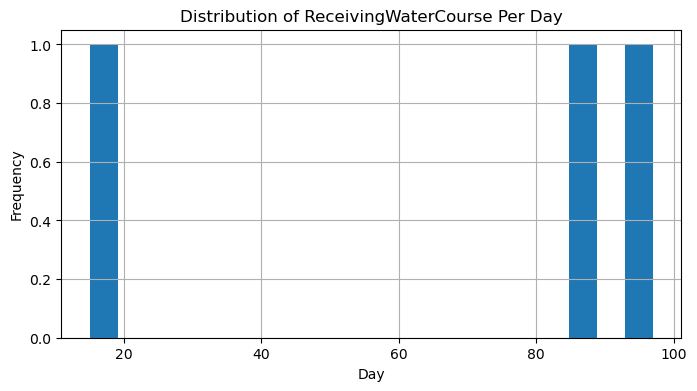

In [30]:
df_alert_stream['ReceivingWaterCourse'] = df_alert_stream['ReceivingWaterCourse'].astype('object')
ReceivingWaterCourse = df_alert_stream.copy()
ReceivingWaterCourse['date'] = ReceivingWaterCourse.DateTime.dt.date

ReceivingWaterCourse.groupby('date').size().hist(bins=20, figsize=(8, 4))
plt.title("Distribution of ReceivingWaterCourse Per Day")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.show()

Specific Days with Alerts: The histogram indicates that alerts were recorded only on certain days (around day 20 and around day 100). This could imply that incidents leading to alerts are rare or occur under specific conditions.

Frequency of Alerts on Recorded Days: On the days when alerts were recorded, the frequency was consistent, with each day having a count of 1 alert.

Gaps in Data: The large gaps between days with alerts suggest that there were long periods without any recorded alerts. This might indicate specific events or conditions that trigger alerts, rather than a regular occurrence.

Looking at the histogram provided, we can make the following interpretations about the distribution of alerts per day:

##### Summary:

The histogram illustrates that alerts related to the 'ReceivingWaterCourse' were recorded on specific, isolated days. The frequency on those days was consistent (1 alert per day), and there are significant gaps between these days, indicating that alerts are infrequent and occur under certain conditions or events. This pattern might require further investigation to understand the underlying causes of the alerts on those specific days.

#### Receiving Water Course by Day of the Week

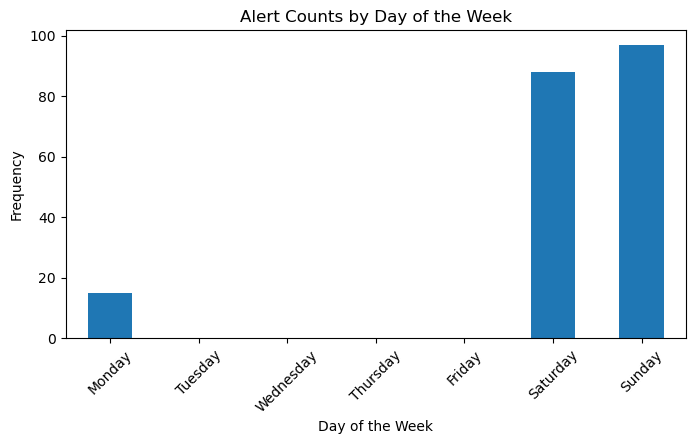

In [31]:
# Ensure 'DateTime' column is in datetime format
df_alert_stream['DateTime'] = pd.to_datetime(df_alert_stream['DateTime'])

# Extract the day of the week from 'DateTime' and add it as a new column
df_alert_stream['day_of_week'] = df_alert_stream['DateTime'].dt.day_name()

# Group by 'DayOfWeek' and count the number of alerts per day
alerts_per_day_of_week = df_alert_stream.groupby('day_of_week').size()

# Ensure the days of the week are in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
alerts_per_day_of_week = alerts_per_day_of_week.reindex(days_order)

# Plot the alert counts by day of the week
alerts_per_day_of_week.plot(kind='bar', figsize=(8, 4))
plt.title("Alert Counts by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

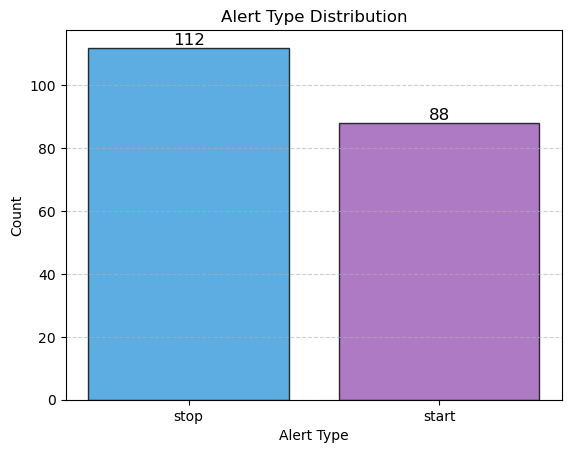

In [32]:
# Count the occurrences of each unique value
value_counts = df_alert_stream['AlertType'].value_counts()

# Extract the unique values and their counts
statuses = value_counts.index
counts = value_counts.values

# (adjust as desired)
colors = ['#3498db', '#9b59b6']

plt.bar(statuses, counts, color=colors, edgecolor='black', linewidth=1, alpha=0.8)

# Add data labels
for i, v in enumerate(counts):
  plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

# Grid lines and background
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.gca().set_facecolor('white')  # White background

# Adding title and labels
plt.title('Alert Type Distribution')
plt.xlabel('Alert Type')
plt.ylabel('Count')
plt.savefig("Alert_Type_Distribution.png")

# Display the plot
plt.show()

The Alert distribution above shows that we have more "Stop" alert type (with a count of 112), compareed to the "Start" alert type with a count of 88

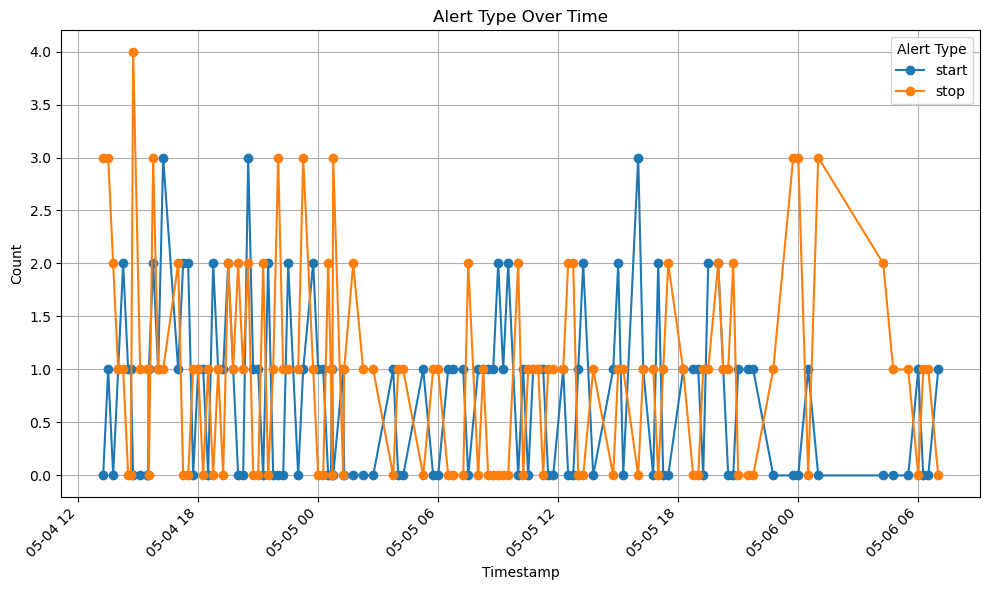

In [33]:
# Get all unique alert statuses
all_statuses = df_alert_stream['AlertType'].unique()

# Grouping data by 'StatusChange' and counting occurrences of each alert status
status_counts = df_alert_stream.groupby('DateTime')['AlertType'].value_counts().unstack().fillna(0)

# Plotting
status_counts.plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Alert Type Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend(title='Alert Type', labels=all_statuses)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Alert_Type_Over_Time.png")
plt.show()

This visualizes the time series distribution of alert type. From the chart, it can be seen that the "stop" alert occurred more at eary afternoon. This could be due to the fact that a lot of residents are at work and seriously engaged in one activiyy or the other, and therefore are not making good use of sewer systems

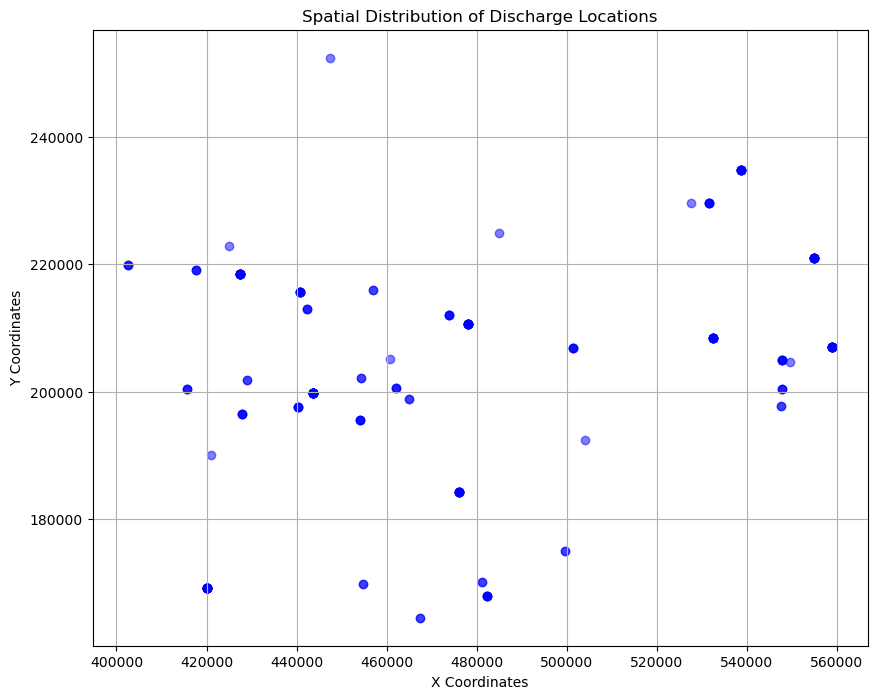

In [34]:
import matplotlib.pyplot as plt

# Extract X and Y coordinates
x_coordinates = df_alert_stream['X']
y_coordinates = df_alert_stream['Y']

# Plot the spatial distribution
plt.figure(figsize=(10, 8))
plt.scatter(x_coordinates, y_coordinates, color='blue', alpha=0.5)
plt.title('Spatial Distribution of Discharge Locations')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.show()

This scatter plot illustrates how discharge locations are spread across the X-Y plane, showcasing their spatial distribution using their respective X and Y coordinates. Each data point on the plot represents a discharge location, offering a visual understanding of how they are distributed across the X-Y plane.

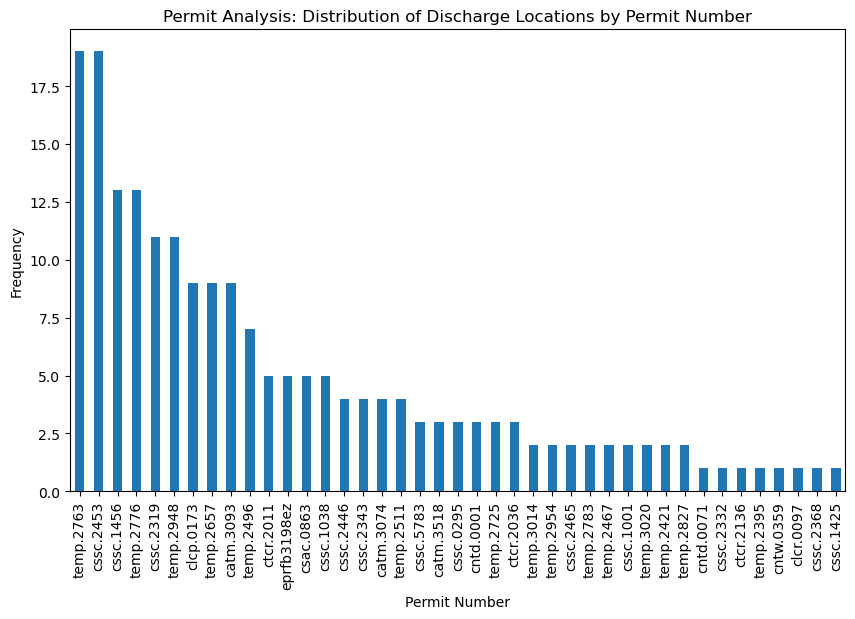

In [35]:
# Count occurrences of each permit number
permit_counts = df_alert_stream['PermitNumber'].value_counts()

# Plot distribution of permits
plt.figure(figsize=(10, 6))
permit_counts.plot(kind='bar')
plt.title('Permit Analysis: Distribution of Discharge Locations by Permit Number')
plt.xlabel('Permit Number')
plt.ylabel('Frequency')
plt.show()

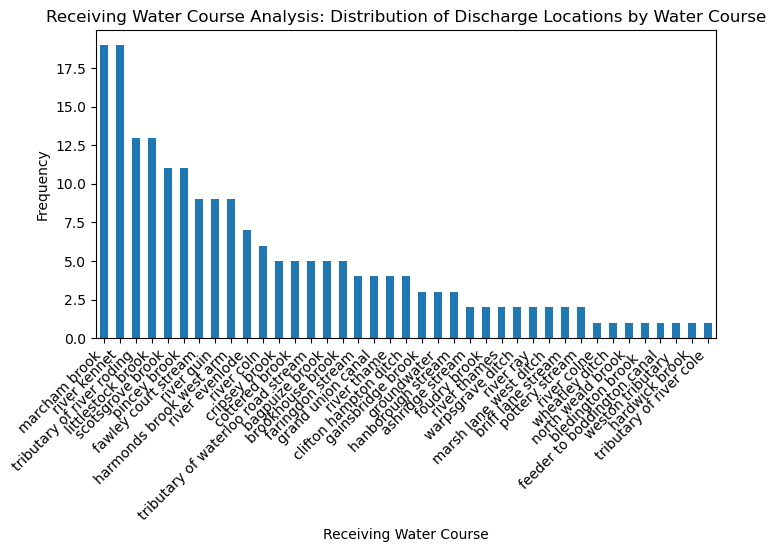

In [36]:
# Count occurrences of each receiving water course
watercourse_counts = df_alert_stream['ReceivingWaterCourse'].value_counts()

# Plot distribution of receiving water courses
plt.figure(figsize=(8, 4))
watercourse_counts.plot(kind='bar')
plt.title('Receiving Water Course Analysis: Distribution of Discharge Locations by Water Course')
plt.xlabel('Receiving Water Course')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Receiving_Water_Course_Analysis.png")
plt.show()

The bar plot shows the distribution of discharge locations across different receiving water courses in the dataset. Each bar represents a unique receiving watercourse, and the height of the bar indicates the frequency or count of occurrences of discharge locations associated with a particular watercourse. 

The bar chart shows that the top three receiving water courses with the most discharges are Marcham Brook (over 17.5 times), river Kennet (over 17.5 times), and the tributary of River Roding ( just a little 12.5 times).

## Count of Location Name

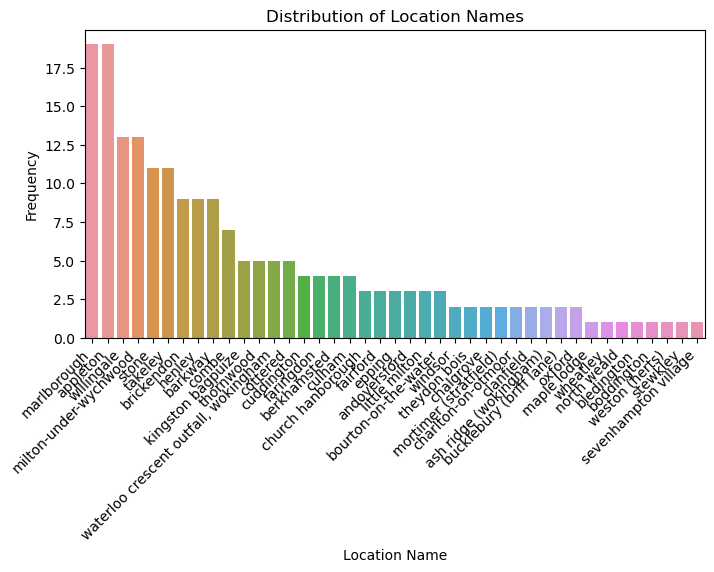

In [37]:
LocationName_Counts = df_alert_stream['LocationName'].value_counts()

# Reorder the dataframe based on the sorted LocationName counts
sorted_location_names = LocationName_Counts.index

# Create a categorical type with the sorted order
df_alert_stream['LocationName'] = pd.Categorical(df_alert_stream['LocationName'], categories=sorted_location_names, ordered=True)

plt.figure(figsize=(8, 4))
sns.countplot(data=df_alert_stream, x='LocationName', order=sorted_location_names)
plt.title('Distribution of Location Names')
plt.xlabel('Location Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Distribution_of_Location_Names.png")
plt.show()


The plot that visualizes the distribution of location names in the Thame Water Alert Stream data. Each bar represents a unique location name, and the height of the bar indicates the frequency of discharges of that location name in the dataset. 

From the chart, it can be seen that Marlborough (over 17.5 times), Appleton (over 17.5 times), Willingale (over 12.5 times), and Milton-under-Wychwood (over 12.5 times) had the most occurrences of discharge, with  Marlborough and Appleton topping the chart.

## Count of Permit Number

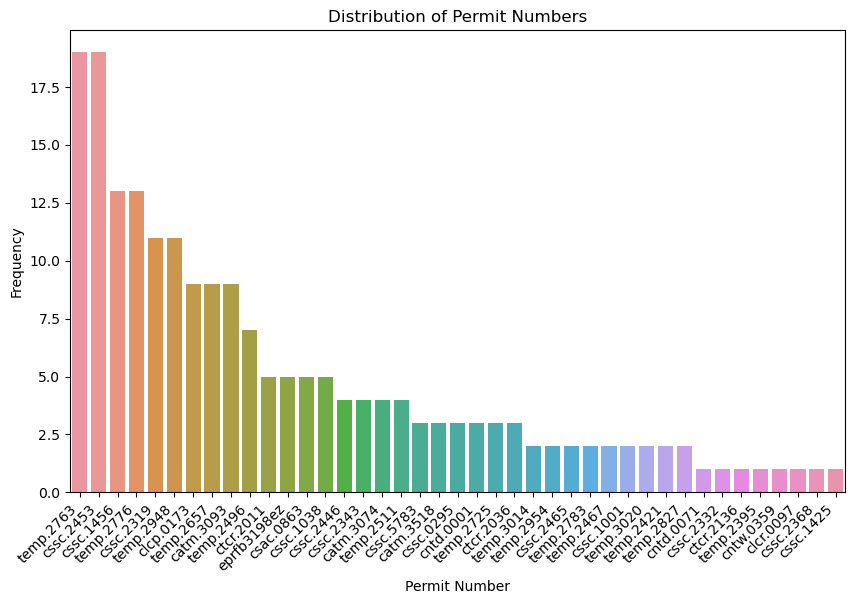

In [38]:
Permitnumber_counts = df_alert_stream['PermitNumber'].value_counts()

# Reorder the dataframe based on the sorted PermitNumber counts
sorted_permit_number = Permitnumber_counts.index

# Create a categorical type with the sorted order
df_alert_stream['PermitNumber'] = pd.Categorical(df_alert_stream['PermitNumber'], categories=sorted_permit_number, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_alert_stream, x='PermitNumber', order=sorted_permit_number)
plt.title('Distribution of Permit Numbers')
plt.xlabel('Permit Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### Distribution of Receiving Water Course

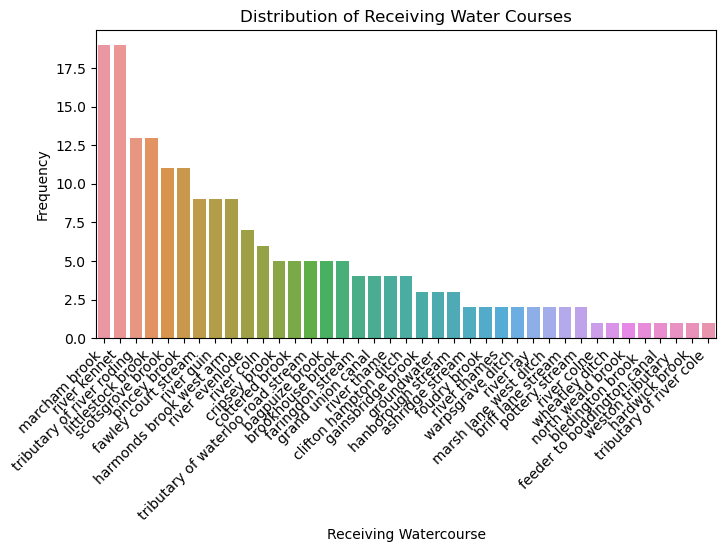

In [39]:
Watercourse_counts = df_alert_stream['ReceivingWaterCourse'].value_counts()

# Reorder the dataframe based on the sorted PermitNumber counts
sorted_water_courses = Watercourse_counts.index

# Create a categorical type with the sorted order
df_alert_stream['ReceivingWaterCourse'] = pd.Categorical(df_alert_stream['ReceivingWaterCourse'], categories=sorted_water_courses, ordered=True)

plt.figure(figsize=(8, 4))
sns.countplot(data=df_alert_stream, x='ReceivingWaterCourse', order=sorted_water_courses)
plt.title('Distribution of Receiving Water Courses')
plt.xlabel('Receiving Watercourse')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

The plot that visualizes the distribution of Receiving Water Course in the Thame Water Alert Stream data. Each bar represents a unique Water Course, and the height of the bar indicates the frequency of discharges of that Water Course in the dataset. 

From the chart, it can be seen that River Kennet (over 17.5 times), Marcham Brook (over 17.5 times), Tributary of River roding (over 12.5 times), and Littlestock Brook (over 12.5 times) had the most occurrences of discharge, with  River Kennet and Marcham Brook topping the chart.

### Distribution of X (Easting Coordinate or Longitude)

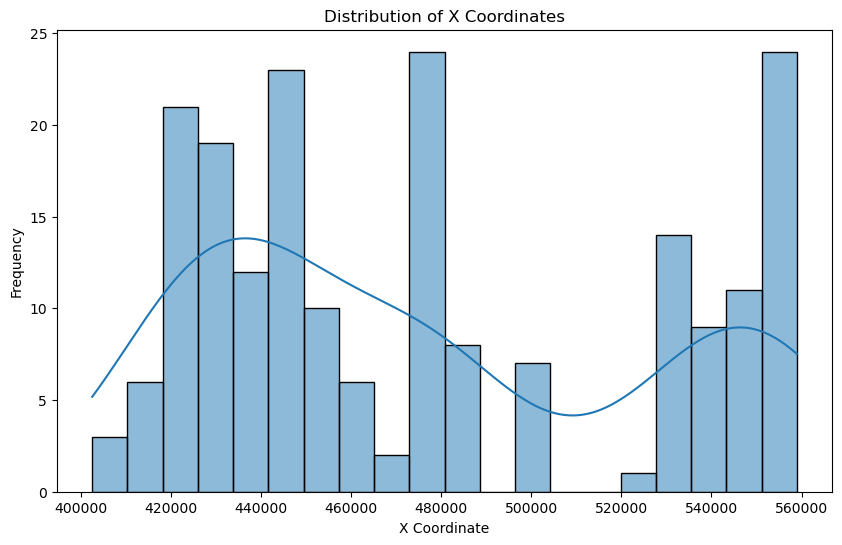

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_alert_stream, x='X', bins=20, kde=True)
plt.title('Distribution of X Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Frequency')
plt.show()

The X Coordinates values are skewed to the right. This means most of the data points are clustered on the left side of the graph, and there are a few high-value outliers on the right side. It looks like a long tail stretching to the right. 

In otherwords, the longitudinal data are positively skewed.

### Distribution of Y (Northing Coordinate or Latitude)

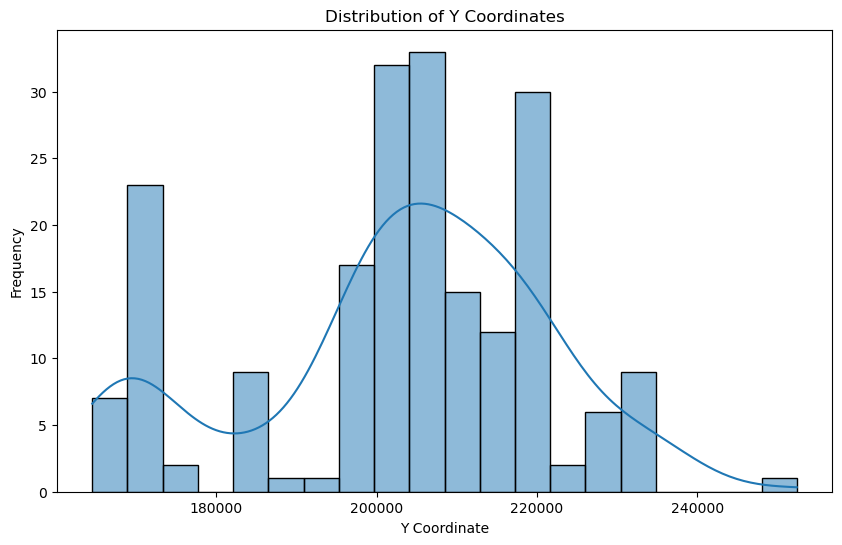

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_alert_stream, x='Y', bins=20, kde=True)
plt.title('Distribution of Y Coordinates')
plt.xlabel('Y Coordinate')
plt.ylabel('Frequency')
plt.show()

The Y coordinates values are skewed to the left. This means most of the data points are clustered on the right side of the graph, and there are a few low-value outliers on the left side. It looks like a long tail stretching to the left. 

In otherwoards, the latitudinal data are negatively skewed.

### Scatter plot of Longitude (X) againts Latitude (Y)

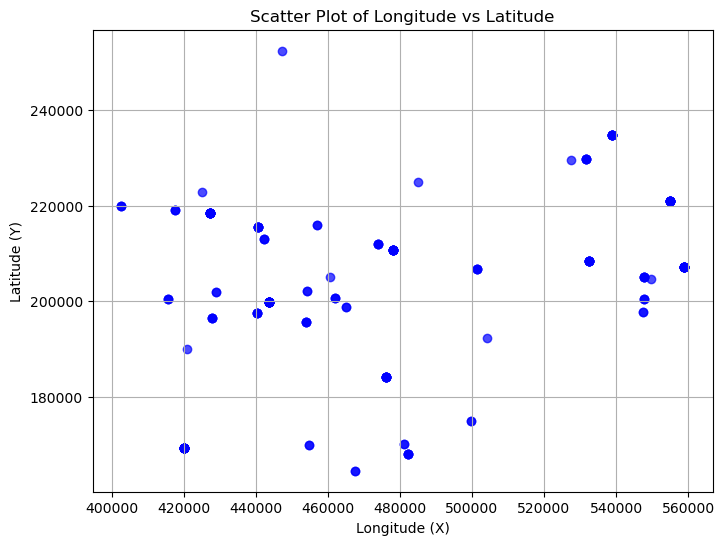

In [42]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_alert_stream['X'], df_alert_stream['Y'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.title('Scatter Plot of Longitude vs Latitude')

# Add gridlines (optional)
plt.grid(True)
plt.savefig("Scater_Plot_of_Longitude_Vs_Latitude.png")

# Show the plot
plt.show()

## Correlation Matrix for X and Y

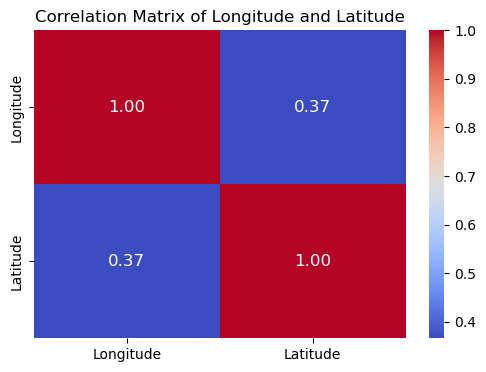

In [43]:
data = {
    'Longitude': df_alert_stream['X'],
    'Latitude': df_alert_stream['Y']
}

# Create DataFrame from sample data
df_alert_stream = pd.DataFrame(data)

# Compute correlation matrix
correlation_matrix = df_alert_stream.corr()

# Create heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix of Longitude and Latitude')
plt.savefig("Correlation_Matrix.png")
plt.show()

The correlation matrix shows how each variable (Longitude and Latitude) relates to each other. In simple terms, it tells us if one variable tends to increase as the other increases, we have a positive correlation, and if one variable tends to decrease as the other increases, then we have a negative correlation, or if there is no association between the variables, we say there is no correlation between them.

From the table below, we can see a positive correlation between the longitude and latitude of sewer overflow locations.

### Correlation Heatmap between X and Y

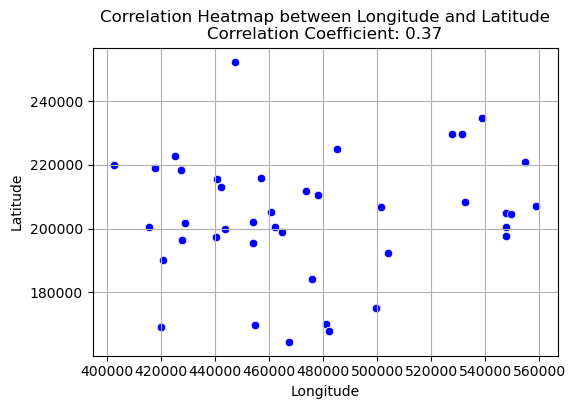

In [44]:
# Create DataFrame from sample data
df_alert_stream = pd.DataFrame(data)

# Calculate correlation coefficient
correlation_coefficient = df_alert_stream['Longitude'].corr(df_alert_stream['Latitude'])

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_alert_stream, x='Longitude', y='Latitude', color='blue')
plt.title(f'Correlation Heatmap between Longitude and Latitude\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show the plot
plt.show()

Figure shows the scatter plot of the longitude and latitude of sewer overflow locations. his also shows a positive correlation between the longitude and latitude values of sewer overflow locations.

## Geograpic Plotting

In [45]:
df_alert_stream.head()

,Longitude,Latitude
0,429000,201810
1,531520,229680
2,538780,234760
3,558950,207070
4,558950,207070


In [46]:
X_coord = np.array(df_alert_stream['Longitude'])
Y_coord = np.array(df_alert_stream['Latitude'])

#Convert Easting Northing to longitude and latitude for plotting
np_long, np_lat = convert_lonlat(X_coord, Y_coord)

df_alert_stream['Longitude'] = np_long
df_alert_stream['Latitude'] = np_lat

In [47]:
import geopandas as gpd

#Define variable for all unique coordinates of sewage overflows
unique_coordinates = set(zip(df_alert_stream['Longitude'], df_alert_stream['Latitude']))

#Convert each pair of coordinates to a point geometry using shapely.
unique_coordinates_geometry = [Point(XY) for XY in unique_coordinates]

# Create a GeoDataFrame with the unique coordinates - this is filtered to unique coordinates only.
gdf = gpd.GeoDataFrame(geometry=unique_coordinates_geometry) 
gdf.crs = "EPSG:4326" # Set coordinate reference system so plots correctly.

#Create a simple interactive map where each point is a sewage overflow location where at least 1 overflow occured.
gdf.explore(tooltip = False)

In [48]:
import geopandas as gpd
from shapely.geometry import Point
import folium

# Define variable for all unique coordinates of sewage overflows
unique_coordinates = set(zip(df_alert_stream['Longitude'], df_alert_stream['Latitude']))

# Convert each pair of coordinates to a point geometry using shapely
unique_coordinates_geometry = [Point(XY) for XY in unique_coordinates]

# Create a GeoDataFrame with the unique coordinates - this is filtered to unique coordinates only
gdf = gpd.GeoDataFrame(geometry=unique_coordinates_geometry)
gdf.crs = "EPSG:4326"  # Set coordinate reference system so plots correctly

# Initialize a folium map centered around the mean location of the points
center_lat = gdf.geometry.y.mean()
center_lon = gdf.geometry.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add each point to the map with a popup showing the coordinates
for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f'Location: ({row.geometry.y:.4f}, {row.geometry.x:.4f})',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save('sewage_overflows_map.html')
m  # Uncomment this line to display the map directly in a Jupyter Notebook

This figure shows a simple interactive map. The map shows unique coordinates representing sewage overflow locations from the Thames Water Alert Stream dataset. 

### Plotting Static Map

ReadTimeout: HTTPSConnectionPool(host='tile.openstreetmap.org', port=443): Read timed out. (read timeout=None)

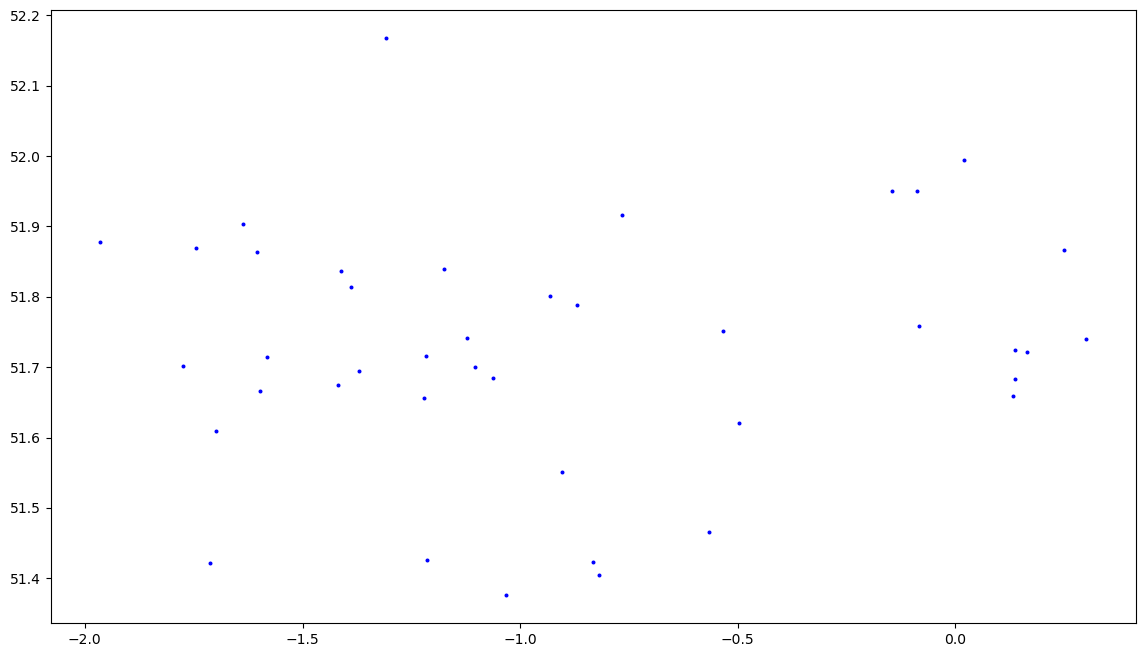

In [52]:
#Static map

fig, ax = plt.subplots()

fig.set_size_inches(14, 14)

gdf.plot(ax = ax, markersize = 14, color = 'blue', marker = '.', zorder=3)

cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig("fig.png")

plt.tight_layout()

This shows a static map of discharge locations within the Thames Water Region.

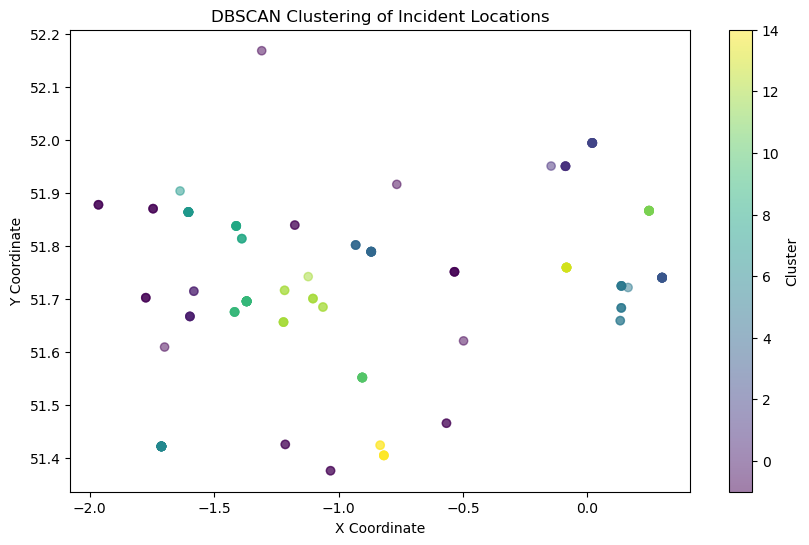

In [50]:
# Extract X and Y coordinates
coords = df_alert_stream[['Longitude', 'Latitude']].values

# Initialize and fit DBSCAN
epsilon = 0.1  # Radius of the neighborhood
min_samples = 5  # Minimum number of points in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(coords)

# Extract cluster labels
cluster_labels = dbscan.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_alert_stream['Longitude'], df_alert_stream['Latitude'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('DBSCAN Clustering of Incident Locations')
plt.colorbar(label='Cluster')
plt.savefig("DBSCAN_Clustering_Alert_stream_data.png")
plt.show()

The clustering on geographic coordinates using the DBSCAN algorithm is visualized above. 
*. The plot shows the geographic distribution of incident locations.
*. Clusters may indicate hotspots or regions with a higher concentration of incidents.
*. Points within the same cluster have the same color.
4. Clusters represent areas where the density of points is high enough.
5. The presence of distinct clusters indicates that there are regions where incidents of discharges are more densely concentrated.
6 Points colored as noise (e.g., gray or black) are scattered and do not belong to any cluster. Noise points may represent outliers or isolated incidents.
7. Points colored yellow represent high density of discharge locations.

In summary, the results of the code provide a visual representation of the spatial distribution of incidents, highlighting areas of high density (clusters) and low density (noise points).

## KNN Clustering of Incident Locations

C:\Users\ctair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


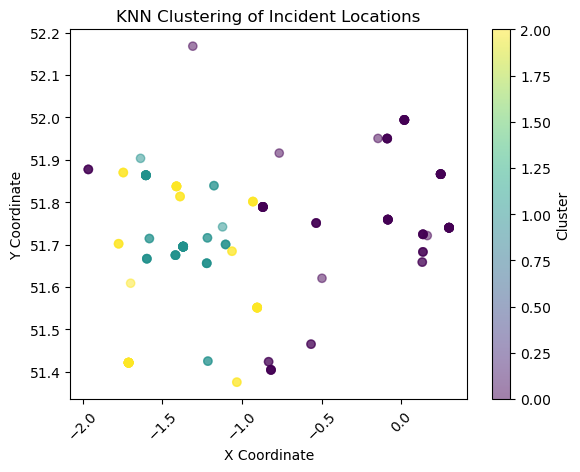

In [51]:
# Extract X and Y coordinates
coords = df_alert_stream[['Longitude', 'Latitude']].values

radius = 0.5 # KNN radius value
nbrs = NearestNeighbors(radius=radius, metric='euclidean').fit(coords)
incident_density = nbrs.radius_neighbors_graph(coords).toarray().sum(axis=1)

# Apply KMeans clustering based on incident density
kmeans = KMeans(n_clusters=3)  # Example number of clusters (adjust based on your data)
kmeans.fit(incident_density.reshape(-1, 1))

# Assign cluster labels to DataFrame
df_alert_stream['Cluster'] = kmeans.labels_

# Visualize clusters
plt.scatter(df_alert_stream['Longitude'], df_alert_stream['Latitude'], c=df_alert_stream['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('KNN Clustering of Incident Locations')
plt.xticks(rotation=45)
plt.colorbar(label='Cluster')
plt.savefig("KNN_Clustering_Alert_stream_data.png")
plt.show()

The clustering on geographic coordinates using a combination of k-nearest neighbors (KNN) for density estimation and KMeans for clustering K-Means algorithm is visualized above. 
1. The scatter plot shows incident of discharge locations colored by their cluster. Each color represents a different cluster identified by the KMeans algorithm.
2. Clusters indicate regions with similar discharge densities. Points within the same cluster have similar densities of neighboring incidents.
3. This visualization helps identify hotspots or areas requiring more attention or resources.
4. It can be used for further analysis to understand why certain areas have higher discharge densities.
5. Points colored as noise (e.g., gray or black) are scattered and do not belong to any cluster. Noise points may represent outliers or isolated incidents.
6. Points colored yellow represent high density of discharge locations.

In summary, the output shows the density of discharge incidents around each point, clusters these densities using KMeans, and visualizes the clusters on a scatter plot. This helps in understanding the spatial distribution and density of discharge incidents across the geographic area.